# The $k$-nearest neighbors (KNN, $k$-NN) algorithm

Authors:

Joseph Salmon, Alexandre Gramfort, Claire Vernade, Mathurin Massias

In [32]:
# test
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy import stats
from sklearn import neighbors
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


from tp_knn_source import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                           rand_checkers, rand_clown, plot_2d, ErrorCurve,
                           frontiere_new, LOOCurve)


import seaborn as sns
from matplotlib import rc


plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
_ = sns.axes_style()

## Data generation

In [39]:
np.random.seed(42)  # fix seed globally

n = 100
# infer the parameters and choose their values
#rand_gauss(n, mu, sigma)

n1 = 20
n2 = 20
# TODO for four functions
X1, y1 = rand_bi_gauss()

n1 = 50
n2 = 50
n3 = 50
X2, y2 = rand_tri_gauss()

n1 = 50
n2 = 50

X3, y3 = rand_checkers()

n1 = 150
n2 = 150
X4, y4 = rand_clown()

Text(0.5, 1.0, 'Second data set')

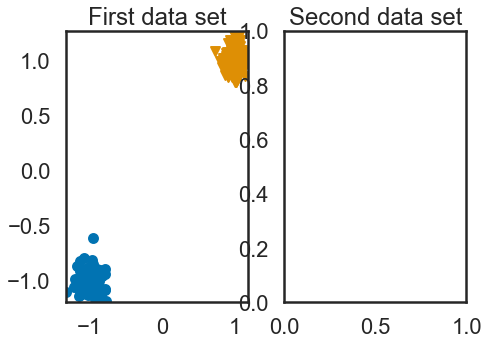

In [40]:
############################################################################
#     Displaying labeled data
############################################################################

plt.show()
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.subplot(141)
plt.title('First data set')
plot_2d(X1, y1)

plt.subplot(142)
plt.title('Second data set')
# todo plot,
# todo other datasets on other subplots



## The $k$-NN algorithm

In [92]:
# Write your own implementation
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy import stats
import numpy as np 
class KNNClassifier(BaseEstimator, ClassifierMixin):
    """ Home made KNN Classifier class"""
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        # no work is done at fit time, except storing training data
        self.X_ = X
        self.y_ = y
        return self

    def predict(self, X):
        n_samples, n_features = X.shape
        #  Compute all pairwise distances between X and self.X_
        D = cdist(X, self.X_)

        # sort the distance matrix D 
        D_sorted = np.argsort(D, axis=1)
    
        # compute mask of element to keep
        idx = D_sorted < self.n_neighbors
        
        # slect y_label of element that satisfy mask row-wise 
        Y_neighbors = [ self.y_[idx[row_id,:]] for row_id in range(n_samples)]
        Y_neighbors = np.array(Y_neighbors)
        # compute the most frequent label in Y_neighbors
        y_pred = stats.mode(Y_neighbors,axis=1).mode

        return y_pred.ravel()

# test 
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([3, 2, 0, 2])
knn = KNNClassifier(n_neighbors=2)
knn.fit(X, y)
knn.predict(np.array([[1, 2], [3.1, 4], [1, 2.1], ]))

array([2, 0, 2])

In [41]:


# Focus on dataset 2
X_train = X1[::2]
Y_train = y1[::2]
X_test = X1[1::2]
Y_test = y1[1::2]



# your classifier
n_neighbors = 1
knn = KNNClassifier(n_neighbors=n_neighbors)

Y_pred = knn.fit(X_train, Y_train).predict(X_test)
# import knn from sklearn 
from sklearn.neighbors import KNeighborsClassifier
sknn = KNeighborsClassifier(n_neighbors=n_neighbors)

Y_pred_skl = sknn.fit(X_train, Y_train).predict(X_test)

# score classification
from sklearn.metrics import accuracy_score 
print(accuracy_score(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred_skl))



0.41
1.0


In [ ]:
# test now for all datasets

n_neighbors = 5  # the k in k-NN
knn = neighbors.KNeighborsClassifier # todo


# TODO something like:
# for data in [data1, data2, data3, data4]:
    # TODO: fit your knn in the loop
    
    plt.figure()
    #todo plot
    n_labels = # TODO
    frontiere_new(knn, X, y, w=None, step=50, alpha_choice=1,
                  n_labels=n_labels, n_neighbors=n_neighbors)

In [ ]:
# Display the predictions when varying the value of k


plt.figure(3, figsize=(12, 8))
plt.subplot(3, 5, 3)
plot_2d(X_train, Y_train)
plt.xlabel('Samples')
ax = plt.gca()
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])

for n_neighbors in # TODO:
    # TODO 
    plt.subplot(3, 5, 5 + n_neighbors)
    # todo put a label indicating the number of neighbors used in the algo
    

    frontiere_new(knn, X, y, w=None, step=50, alpha_choice=1,
                  colorbar=False, samples=False)
    plt.draw()  # update plot

plt.tight_layout()

In [ ]:
# Scores on train data
n_neighbors = 1



# TODO use knn.score, on test and train

In [ ]:
# Scores on left out data

n1 = n2 = 200
sigma = 0.1
data4 = rand_checkers(2 * n1, 2 * n2, sigma)

X_train = X4[::2]
Y_train = y4[::2].astype(int)
X_test = X4[1::2]
Y_test = y4[1::2].astype(int)


# TODO instantiate ErrorCurve with k_range=range(1, 51)
error_curve = 
# TODO fit it, plot it


In [ ]:
collist = ['blue', 'grey', 'red', 'purple', 'orange', 'salmon', 'black',
           'fuchsia']

sigma = 0.1
plt.figure(5)
range_n_samples = [100, 500, 1000]
niter = len(range_n_samples)
for n in range(niter):
    n1 = n2 = range_n_samples[n]
    X_train, Y_train = rand_checkers(n1, n2, sigma)
    X_test, Y_test = rand_checkers(n1, n2, sigma)
    # TODO fit and plot with color varying from collist

plt.legend(["training size : %d" % n for n in range_n_samples],
           loc='upper left')

plt.close(6)
plt.figure(6)
plot_2d(X_train, Y_train)
n_neighbors = 40
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, Y_train)



frontiere_new(knn, X_train, Y_train, w=None, step=50, alpha_choice=1)

What are the pros and cons of this classifier?

### Application to the DIGITS dataset

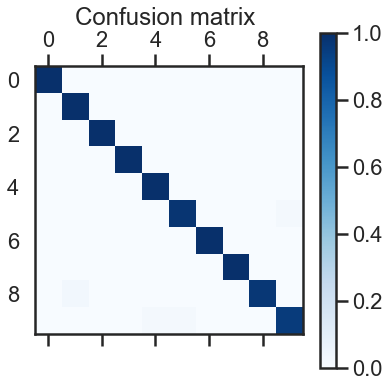

In [36]:
# test k-NN on digits dataset

# The digits dataset
digits = datasets.load_digits()

digits['data'].shape , digits['target'].shape

# split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target']) 
# fit a knn classifier
n_neighbors = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

# compute the confusion matrix on the test set
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# normalize the confusion matrix by row 
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
# plot the confusion matrix 
import matplotlib.pyplot as plt
plt.matshow(conf_matrix_normalized, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion matrix ')
plt.show()






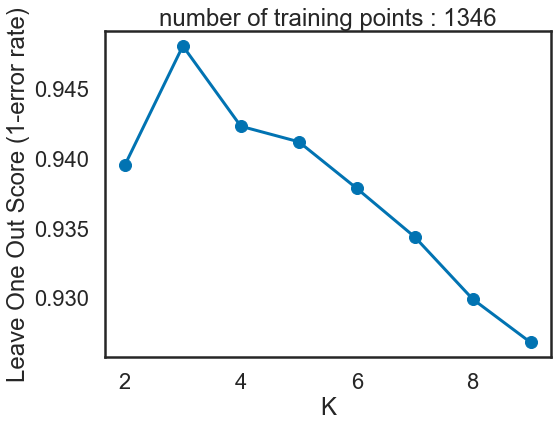

In [123]:
# Estimate k with cross-validation

# Have a look at the class 'LOOCurve', defined in the source file.
# LOO stands for Leave One Out


loo_curve = LOOCurve(k_range = list(range(2, 10)))
loo_curve.fit_curve(X_train, y_train)
loo_curve.plot()
# we can see that k = 3 give the best score . 


### Weighted $k$-NN classifier

In [24]:
# Implement weights for the kNN classifier


def weights_func(dist):
    """Returns an array of weights, exponentially decreasing in the square
    of the distance.

    Parameters
    ----------
    dist : a one-dimensional array of distances.

    Returns
    -------
    weight : array of the same size as dist
    """
    #  use weights equal to exp(- dist^2 / 0.1)
    def f(x):
        return np.exp(- x**2 / 0.1)
    vf = np.vectorize(f)
    return vf(dist) 
 
    
# test 
weights_func(np.array([1, 2, 3] ))



array([4.53999298e-05, 4.24835426e-18, 8.19401262e-40])

In [30]:
# Write your own implementation
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy import stats
import numpy as np 
from sklearn.utils.extmath import weighted_mode
class KNNClassifier(BaseEstimator, ClassifierMixin):
    """ Home made KNN Classifier class"""
    def __init__(self, n_neighbors=1, use_weights=False):
        self.n_neighbors = n_neighbors
        self.use_weights = use_weights

    def fit(self, X, y):
        # no work is done at fit time, except storing training data
        self.X_ = X
        self.y_ = y
        return self

    def predict(self, X):
        n_samples, n_features = X.shape
        #  Compute all pairwise distances between X and self.X_
        D = cdist(X, self.X_)

        # sort the distance matrix D 
        D_sorted = np.argsort(D, axis=1)
        
        # compute mask of element to keep
        idx =D_sorted <self.n_neighbors
        
        # slect y_label of element that satisfy mask row-wise 
        Y_neighbors = [ self.y_[idx[row_id,:]] for row_id in range(X.shape[0]) ]
        Y_neighbors = np.array(Y_neighbors)
        #print(Y_neighbors)
        if self.use_weights:
            # compute weighted D 
           
            weights_D =  [weights_func(D[row_id]) for row_id in range(D.shape[0]) ]
            weights_D = np.array(weights_D)

            weights_D_masked = weights_D[idx].reshape(n_samples, self.n_neighbors)
            #print(weights_D_masked)
            # compute weighted y_label
            y_labels = [weighted_mode(neighbors, weights_)[0] for neighbors,weights_ 
                        in zip(Y_neighbors, weights_D_masked)]
            y_labels = np.array(y_labels)
       
            return y_labels.ravel()
        else :
            # return the most frequent label
            y_labels =  stats.mode(Y_neighbors, axis=1).mode
            return y_labels.ravel()


       
      

      

# test 
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([3, 2, 0, 2])
knn = KNNClassifier(n_neighbors=2, use_weights=True)
knn.fit(X, y)
a = knn.predict(np.array([[1, 2], [3.1, 4], [1, 2.1], ]))
a

array([3., 0., 3.])

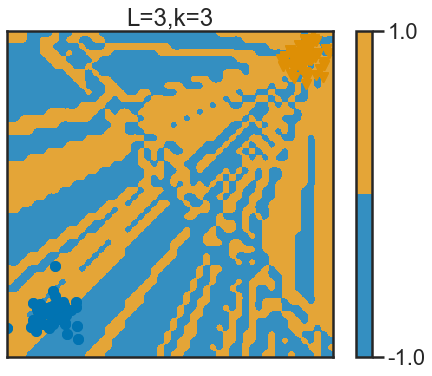

[ 1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1. -1. -1.  1.
 -1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1. -1.
  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.
  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.
  1.  1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.
  1. -1.  1.  1.  1. -1. -1.  1.  1. -1.]


In [43]:

n_neighbors = 5
wknn =KNNClassifier(n_neighbors, use_weights=True)
wknn.fit(X_train, Y_train)
plt.figure(4)
plot_2d(X_train, Y_train)


frontiere_new(knn, X_train, Y_train, w=None, step=50, alpha_choice=1)
plt.show()

print(wknn.predict(X_train))